# Use the RWCP data

###  Download the RWCP and NOISEX Data

In [2]:
%%bash
DATA_PATH='/media/moreaux/Data/Dataset/'
cd $DATA_PATH
wget http://www.openslr.org/resources/13/RWCP.tar.gz
tar -xzf RWCP.tar.gz
mkdir ./NOISEX92
cd ./NOISEX92
wget http://spib.linse.ufsc.br/data/noise/factory1.mat # Factory Floor 1
wget http://spib.linse.ufsc.br/data/noise/buccaneer1.mat # Jet Cockpit 1
wget http://spib.linse.ufsc.br/data/noise/babble.mat # Speech Babble
wget http://spib.linse.ufsc.br/data/noise/destroyerops.mat # Destroyer Control Room

mkdir: cannot create directory ‘./NOISEX92’: File exists
--2017-06-09 17:32:33--  http://spib.linse.ufsc.br/data/noise/factory1.mat
Resolving spib.linse.ufsc.br (spib.linse.ufsc.br)... 150.162.83.131
Connecting to spib.linse.ufsc.br (spib.linse.ufsc.br)|150.162.83.131|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9400000 (9,0M)
Saving to: ‘factory1.mat’

     0K .......... .......... .......... .......... ..........  0% 74,9K 2m2s
    50K .......... .......... .......... .......... ..........  1%  150K 91s
   100K .......... .......... .......... .......... ..........  1% 25,1M 60s
   150K .......... .......... .......... .......... ..........  2%  105M 45s
   200K .......... .......... .......... .......... ..........  2%  151K 48s
   250K .......... .......... .......... .......... ..........  3% 34,7M 40s
   300K .......... .......... .......... .......... ..........  3% 68,7M 34s
   350K .......... .......... .......... .......... ..........  4% 93,9M 29s

### Check if you can read the Data

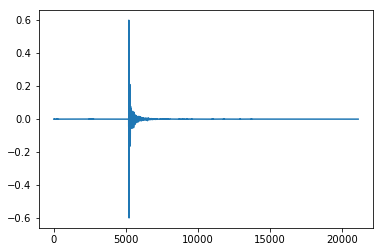

In [1]:
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt


data_path = '/media/moreaux/Data/Dataset/'
RWCP_test_path = data_path + "RWCP/nospeech/drysrc/a1/cherry1/48khz/002.raw"
RawFormat = {                                      
    'format': 'RAW',                                                                                                                                                                                           
    'channels': 1,
    'samplerate': 48000, # 48 
    'endian': 'LITTLE', # little ending
    'subtype': 'PCM_16' 
}
x, fs = sf.read(RWCP_test_path, dtype='float32', **RawFormat)
sd.play(x, 48000)
plt.plot(x)
plt.show()

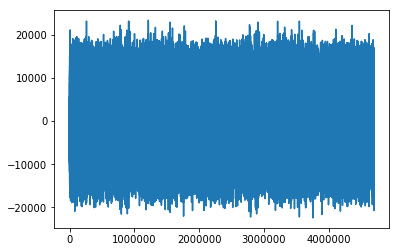

In [2]:
from scipy.io import loadmat

NOISEX92_test_path = data_path + "NOISEX92/buccaneer1.mat"
mat = loadmat(NOISEX92_test_path)
x = mat['buccaneer1']
sd.play(x, 19980)
plt.plot(x)
plt.show()

### Test mixing the two audio signals